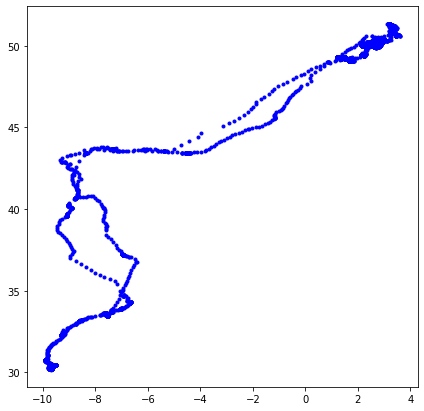

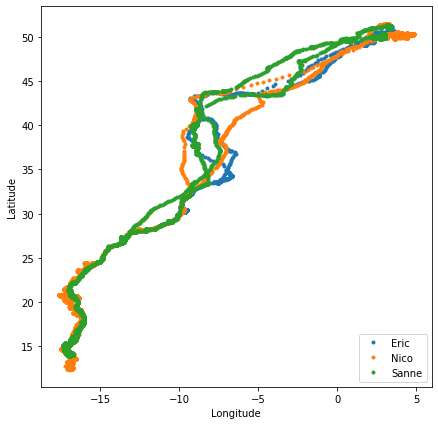

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import cartopy.crs as ccrs
import cartopy.feature as cfeature

  
  
birddata = pd.read_csv("bird_tracking.csv")
bird_names = pd.unique(birddata.bird_name) 
  
# storing the indices of the bird Eric
ix = birddata.bird_name == "Eric" 
x,y = birddata.longitude[ix], birddata.latitude[ix]
plt.figure(figsize = (7,7))
plt.plot(x,y,"b.")
  
''' To look at all the birds trajectories,
    we plot each bird in the same plot '''
plt.figure(figsize = (7,7))
for bird_name in bird_names:
  
    # storing the indices of the bird Eric
    ix = birddata.bird_name == bird_name  
    x,y = birddata.longitude[ix], birddata.latitude[ix]
    plt.plot(x,y,".", label=bird_name)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(loc="lower right")
plt.show()

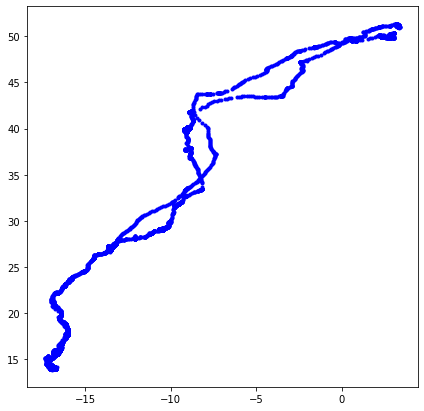

In [3]:
plt.figure(figsize = (7,7))
plt.plot(x,y,"b.")

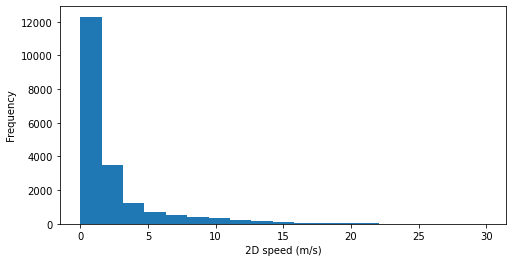

In [16]:
# storing the indices of the bird Eric
ix = birddata.bird_name == "Eric"
speed = birddata.speed_2d[ix]

plt.figure(figsize = (8,4))
ind = np.isnan(speed)
# print(ind)
# display(speed[ind])
plt.hist(speed[~ind], bins = np.linspace(0,30,20))
plt.xlabel(" 2D speed (m/s) ")
plt.ylabel(" Frequency ")
plt.show()


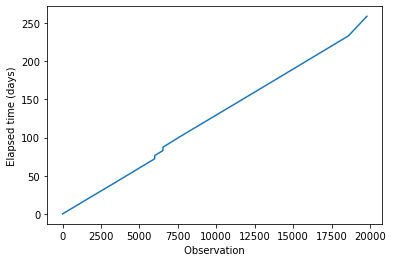

In [14]:
import datetime


timestamps = []
for k in range(len(birddata)):
	timestamps.append(datetime.datetime.strptime(birddata.date_time.iloc[k][:-3], "%Y-%m-%d %H:%M:%S"))

birddata["timestamp"] = pd.Series(timestamps, index = birddata.index)

times = birddata.timestamp[birddata.bird_name == "Eric"]
elapsed_time = [time-times[0] for time in times]

plt.plot(np.array(elapsed_time)/datetime.timedelta(days=1))
plt.xlabel(" Observation ")
plt.ylabel(" Elapsed time (days) ")
plt.show()


[0.0 0.02082175925925926 0.04155092592592593 ... 258.9399652777778
 258.9607175925926 258.9814930555556]


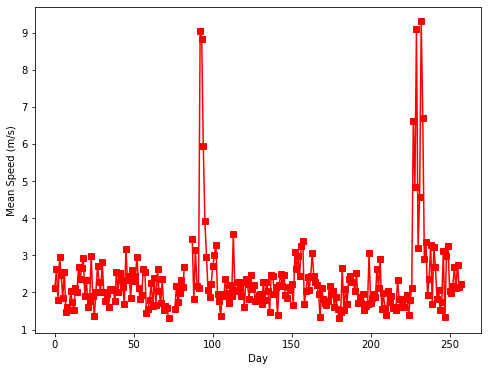

In [35]:

import datetime

timestamps = []
for k in range(len(birddata)):
	timestamps.append(datetime.datetime.strptime(birddata.date_time.iloc[k][:-3], "%Y-%m-%d %H:%M:%S"))
birddata["timestamp"] = pd.Series(timestamps, index = birddata.index)

# display(birddata["timestamp"])

data = birddata[birddata.bird_name == "Eric"]
times = data.timestamp
elapsed_time = [time-times[0] for time in times]

# print(elapsed_time)

elapsed_days = np.array(elapsed_time)/datetime.timedelta(days=1)
print(elapsed_days)

next_day = 1
inds = []
daily_mean_speed = []
for (i,t) in enumerate(elapsed_days):
	if t < next_day:
		inds.append(i)
	else:
		daily_mean_speed.append(np.mean(data.speed_2d[inds]))
		next_day += 1
		inds = []

plt.figure(figsize = (8,6))
plt.plot(daily_mean_speed, "rs-")
plt.xlabel(" Day ")
plt.ylabel(" Mean Speed (m/s) ");
plt.show()


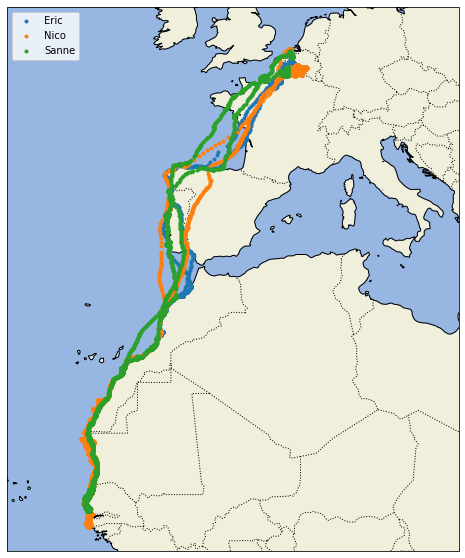

In [38]:
# To move forward, we need to specify a
# specific projection that we're interested
# in using.
proj = ccrs.Mercator()

plt.figure(figsize=(10,10))
ax = plt.axes(projection=proj)

ax.set_extent((-25.0, 20.0, 52.0, 10.0))
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
for name in bird_names:
	ix = birddata['bird_name'] == name
	x,y = birddata.longitude[ix], birddata.latitude[ix]
	ax.plot(x,y,'.', transform=ccrs.Geodetic(), label=name)
plt.legend(loc="upper left")
plt.show()
